<a href="https://colab.research.google.com/github/rizky-gumelar/Fall-Detection-Classification/blob/main/DataSlayer_Multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import shutil
from sklearn.model_selection import train_test_split
import os
import zipfile

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import zipfile
zip_path = '/content/drive/MyDrive/DataSlayer/data-slayer-2-0-machine-learning-competition.zip'
extract_path = '/content/dataset'  # Tempat untuk mengekstrak file

# Ekstraksi file ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Cek apakah dataset berhasil diekstrak
os.listdir(extract_path)

['test', 'sample_submission.csv', 'train']

In [ ]:
!rm -r /content/data

In [ ]:
# @title MengCopy menjadi Multiclass
import os
import shutil

# Tentukan folder input dan output
input_dir = '/content/dataset/train'  # Path ke folder train yang berisi subjek-subjek
output_dir = '/content/multiclass_data'  # Path ke folder output yang lebih sederhana

# Pemetaan nama kelas untuk setiap subjek
class_mapping = {
    'subject-1': {
        'fall': {
            '1_forward_falls': 'forward_falls',
            '1_right_falls': 'right_falls',
            '1_left_falls': 'left_falls',
            '1_backward_falls': 'backward_falls',
            '1_standing_falls': 'standing_falls',
            '1_sitting_falls': 'sitting_falls',
        },
        'non_fall': {
            '1_walking': 'walking',
            '1_jumping': 'jumping',
            '1_stretching': 'stretching',
            '1_squat': 'squat',
            '1_picking': 'picking',
            '1_laying': 'laying',
        }
    },
    'subject-2': {
        'fall': {
            '2_forward_falls': 'forward_falls',
            '2_right_falls': 'right_falls',
            '2_left_falls': 'left_falls',
            '2_backward_falls': 'backward_falls',
            '2_standing_falls': 'standing_falls',
            '2_sitting_falls': 'sitting_falls',
        },
        'non_fall': {
            '2_walking': 'walking',
            '2_jumping': 'jumping',
            '2_stretching': 'stretching',
            '2_squat': 'squat',
            '2_picking': 'picking',
            '2_laying': 'laying',
        }
    },
    'subject-3': {
        'fall': {
            '3_forward_falls': 'forward_falls',
            '3_right_falls': 'right_falls',
            '3_left_falls': 'left_falls',
            '3_backward_falls': 'backward_falls',
            '3_standing_falls': 'standing_falls',
            '3_sitting_falls': 'sitting_falls',
        },
        'non_fall': {
            '3_walking': 'walking',
            '3_jumping': 'jumping',
            '3_stretching': 'stretching',
            '3_squat': 'squat',
            '3_picking': 'picking',
            '3_laying': 'laying',
        }
    },
    'subject-4': {
        'fall': {
            '4_forward_falls': 'forward_falls',
            '4_right_falls': 'right_falls',
            '4_left_falls': 'left_falls',
            '4_backward_falls': 'backward_falls',
            '4_standing_falls': 'standing_falls',
            '4_sitting_falls': 'sitting_falls',
        },
        'non_fall': {
            '4_walking': 'walking',
            '4_jumping': 'jumping',
            '4_stretching': 'stretching',
            '4_squat': 'squat',
            '4_picking': 'picking',
            '4_laying': 'laying',
        }
    }
}

# Daftar kelas aktivitas
classes = [
    'forward_falls', 'right_falls', 'left_falls', 'backward_falls',
    'standing_falls', 'sitting_falls', 'walking', 'jumping',
    'stretching', 'squat', 'picking', 'laying'
]

# Loop untuk setiap kelas dan subjek
for activity in classes:
    # Buat folder tujuan jika belum ada
    dest_folder = os.path.join(output_dir, activity)
    os.makedirs(dest_folder, exist_ok=True)

    # Loop untuk setiap subjek
    for subject_id in ['subject-1', 'subject-2', 'subject-3', 'subject-4']:
        # Pemetaan untuk folder `fall` dan `non_fall`
        for fall_or_nonfall in ['fall', 'non_fall']:
            # Tentukan path sumber gambar berdasarkan mapping
            source_folder = os.path.join(input_dir, subject_id, fall_or_nonfall)
            # Dapatkan nama kelas asli untuk dicocokkan dengan mapping
            for class_name, mapped_class in class_mapping[subject_id][fall_or_nonfall].items():
                if mapped_class == activity:  # Cocokkan dengan kelas tujuan
                    source_path = os.path.join(source_folder, class_name)

                    # Cek apakah folder tersebut ada dan jika ada, pindahkan gambar ke folder tujuan
                    if os.path.exists(source_path):
                        for filename in os.listdir(source_path):
                            file_path = os.path.join(source_path, filename)
                            if os.path.isfile(file_path):
                                # Buat nama file baru dengan menambahkan nama subjek untuk menghindari duplikasi
                                new_filename = f"{filename.split('.')[0]}_{subject_id}.{filename.split('.')[-1]}"
                                dest_path = os.path.join(dest_folder, new_filename)

                                # Salin gambar ke folder tujuan
                                shutil.copy(file_path, dest_path)
                                # print(f'Gambar {filename} dipindahkan sebagai {new_filename} ke {dest_folder}')

print("Proses selesai!")


Proses selesai!


In [ ]:
# @title Menghitung Data Gambar
import os

# Tentukan folder input dan output
input_dir = '/content/dataset/train'  # Path ke folder train yang berisi subjek-subjek
output_dir = '/content/multiclass_data'  # Path ke folder output yang lebih sederhana

# Pemetaan nama kelas untuk setiap subjek
class_mapping = {
    'subject-1': {
        'fall': {
            '1_forward_falls': 'forward_falls',
            '1_right_falls': 'right_falls',
            '1_left_falls': 'left_falls',
            '1_backward_falls': 'backward_falls',
            '1_standing_falls': 'standing_falls',
            '1_sitting_falls': 'sitting_falls',
        },
        'non_fall': {
            '1_walking': 'walking',
            '1_jumping': 'jumping',
            '1_stretching': 'stretching',
            '1_squat': 'squat',
            '1_picking': 'picking',
            '1_laying': 'laying',
        }
    },
    'subject-2': {
        'fall': {
            '2_forward_falls': 'forward_falls',
            '2_right_falls': 'right_falls',
            '2_left_falls': 'left_falls',
            '2_backward_falls': 'backward_falls',
            '2_standing_falls': 'standing_falls',
            '2_sitting_falls': 'sitting_falls',
        },
        'non_fall': {
            '2_walking': 'walking',
            '2_jumping': 'jumping',
            '2_stretching': 'stretching',
            '2_squat': 'squat',
            '2_picking': 'picking',
            '2_laying': 'laying',
        }
    },
    'subject-3': {
        'fall': {
            '3_forward_falls': 'forward_falls',
            '3_right_falls': 'right_falls',
            '3_left_falls': 'left_falls',
            '3_backward_falls': 'backward_falls',
            '3_standing_falls': 'standing_falls',
            '3_sitting_falls': 'sitting_falls',
        },
        'non_fall': {
            '3_walking': 'walking',
            '3_jumping': 'jumping',
            '3_stretching': 'stretching',
            '3_squat': 'squat',
            '3_picking': 'picking',
            '3_laying': 'laying',
        }
    },
    'subject-4': {
        'fall': {
            '4_forward_falls': 'forward_falls',
            '4_right_falls': 'right_falls',
            '4_left_falls': 'left_falls',
            '4_backward_falls': 'backward_falls',
            '4_standing_falls': 'standing_falls',
            '4_sitting_falls': 'sitting_falls',
        },
        'non_fall': {
            '4_walking': 'walking',
            '4_jumping': 'jumping',
            '4_stretching': 'stretching',
            '4_squat': 'squat',
            '4_picking': 'picking',
            '4_laying': 'laying',
        }
    }
}

# Daftar kelas aktivitas
classes = [
    'forward_falls', 'right_falls', 'left_falls', 'backward_falls',
    'standing_falls', 'sitting_falls', 'walking', 'jumping',
    'stretching', 'squat', 'picking', 'laying'
]

# Fungsi untuk menghitung jumlah gambar dalam folder
def count_images(folder_path):
    count = 0
    for root, dirs, files in os.walk(folder_path):
        count += len([f for f in files if os.path.isfile(os.path.join(root, f))])
    return count

# Hitung jumlah gambar sebelum penyalinan
before_copy_count = 0
for subject_id in ['subject-1', 'subject-2', 'subject-3', 'subject-4']:
    for fall_or_nonfall in ['fall', 'non_fall']:
        for class_name in class_mapping[subject_id][fall_or_nonfall]:
            source_path = os.path.join(input_dir, subject_id, fall_or_nonfall, class_name)
            if os.path.exists(source_path):
                before_copy_count += count_images(source_path)

print(f"Jumlah gambar sebelum penyalinan: {before_copy_count}")

# Hitung jumlah gambar setelah penyalinan
after_copy_count = 0
for activity in classes:
    dest_folder = os.path.join(output_dir, activity)
    if os.path.exists(dest_folder):
        after_copy_count += count_images(dest_folder)

print(f"Jumlah gambar setelah penyalinan: {after_copy_count}")

# Verifikasi apakah jumlah gambar sama
if before_copy_count == after_copy_count:
    print("Jumlah gambar sebelum dan setelah penyalinan cocok!")
else:
    print(f"Perbedaan jumlah gambar! Sebelum: {before_copy_count}, Setelah: {after_copy_count}")


Jumlah gambar sebelum penyalinan: 4294
Jumlah gambar setelah penyalinan: 4294
Jumlah gambar sebelum dan setelah penyalinan cocok!


In [ ]:
zip_path = '/content/drive/MyDrive/DataSlayer/multiclass_data.zip'
extract_path = '/'  # Tempat untuk mengekstrak file

# Ekstraksi file ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Cek apakah dataset berhasil diekstrak
os.listdir(extract_path)

['bin',
 'lib64',
 'srv',
 'opt',
 'home',
 'sbin',
 'usr',
 'media',
 'mnt',
 'root',
 'lib32',
 'sys',
 'proc',
 'boot',
 'lib',
 'tmp',
 'run',
 'libx32',
 'var',
 'etc',
 'dev',
 'kaggle',
 'content',
 '.dockerenv',
 'datalab',
 'tools',
 'python-apt',
 'python-apt.tar.xz',
 'NGC-DL-CONTAINER-LICENSE',
 'cuda-keyring_1.0-1_all.deb']

# Split data

In [ ]:
# Membuat direktori untuk training dan testing

extract_path = '/content/multiclass_data'
train_dir = '/content/data/train'
test_dir = '/content/data/test'

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Dapatkan daftar kelas dari dataset yang diekstrak
classes = os.listdir(extract_path)

# Membuat subfolder berdasarkan kelas di dalam folder training dan testing
for class_name in classes:
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

# Memisahkan dataset ke dalam training dan testing
for class_name in classes:
    class_path = os.path.join(extract_path, class_name)
    images = os.listdir(class_path)

    # Membagi data menjadi 80% training dan 20% testing
    train_images, test_images = train_test_split(images, test_size=0.2, random_state=1)

    # Pindahkan file ke folder training
    for img in train_images:
        src_path = os.path.join(class_path, img)
        dest_path = os.path.join(train_dir, class_name, img)
        shutil.copy(src_path, dest_path)

    # Pindahkan file ke folder testing
    for img in test_images:
        src_path = os.path.join(class_path, img)
        dest_path = os.path.join(test_dir, class_name, img)
        shutil.copy(src_path, dest_path)

Gambar dari dataset training:

Kelas: jumping


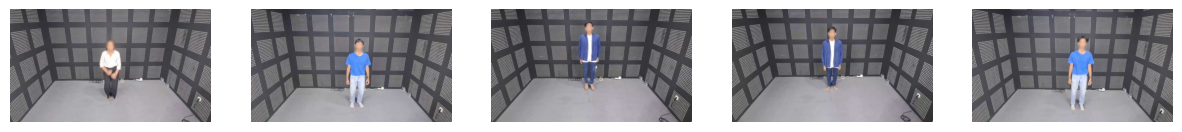


Kelas: picking


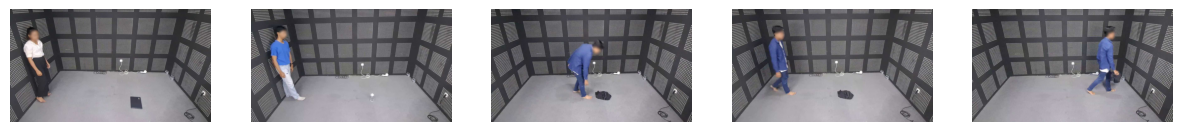


Kelas: right_falls


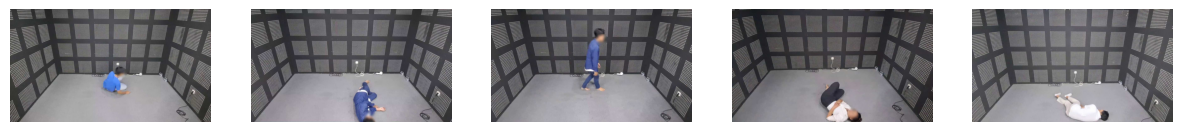


Kelas: laying


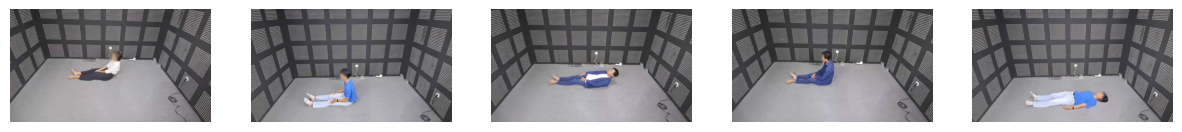


Kelas: left_falls


In [ ]:
# import matplotlib.pyplot as plt
# from PIL import Image

# # Fungsi untuk menampilkan beberapa gambar dari setiap kelas
# def show_images_from_class(directory, num_images=5):
#     classes = os.listdir(directory)

#     for class_name in classes:
#         class_path = os.path.join(directory, class_name)
#         if os.path.isdir(class_path):
#             # Ambil beberapa gambar pertama dari setiap kelas
#             image_files = os.listdir(class_path)[:num_images]

#             # Menampilkan gambar-gambar tersebut
#             print(f"\nKelas: {class_name}")
#             plt.figure(figsize=(15, 5))

#             for i, image_file in enumerate(image_files):
#                 img_path = os.path.join(class_path, image_file)
#                 img = Image.open(img_path)

#                 plt.subplot(1, num_images, i + 1)
#                 plt.imshow(img)
#                 plt.axis('off')

#             plt.show()

# # Tampilkan gambar dari dataset training
# print("Gambar dari dataset training:")
# show_images_from_class(train_dir)

# # Tampilkan gambar dari dataset testing
# print("Gambar dari dataset testing:")
# show_images_from_class(test_dir)

In [ ]:
import os

# Path ke direktori dataset baru (training dan testing)
train_dir = '/content/data/train'
test_dir = '/content/data/test'

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Menghitung jumlah gambar di setiap kelas pada training data
print("Jumlah gambar di setiap kelas pada training set:")
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        print(f"{class_name}: {num_images} gambar")

# Menghitung jumlah gambar di setiap kelas pada testing data
print("\nJumlah gambar di setiap kelas pada testing set:")
for class_name in os.listdir(test_dir):
    class_path = os.path.join(test_dir, class_name)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        print(f"{class_name}: {num_images} gambar")


Jumlah gambar di setiap kelas pada training set:
jumping: 344 gambar
picking: 436 gambar
right_falls: 199 gambar
laying: 332 gambar
left_falls: 180 gambar
standing_falls: 230 gambar
stretching: 389 gambar
backward_falls: 184 gambar
squat: 336 gambar
walking: 358 gambar
forward_falls: 186 gambar
sitting_falls: 256 gambar

Jumlah gambar di setiap kelas pada testing set:
jumping: 87 gambar
picking: 109 gambar
right_falls: 50 gambar
laying: 84 gambar
left_falls: 45 gambar
standing_falls: 58 gambar
stretching: 98 gambar
backward_falls: 47 gambar
squat: 85 gambar
walking: 90 gambar
forward_falls: 47 gambar
sitting_falls: 64 gambar


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

# Tentukan path ke direktori train dan test
train_data_dir = train_dir
test_data_dir = test_dir

# ImageDataGenerator untuk augmentasi data dan normalisasi
train_datagen = ImageDataGenerator(
    rescale=1./255,          # Normalisasi pixel ke [0, 1]
    rotation_range=25,       # Rotasi gambar hingga 40 derajat
    width_shift_range=0.1,   # Geser gambar secara horizontal
    height_shift_range=0.1,  # Geser gambar secara vertikal
    shear_range=0.1,         # Geser sudut gambar
    zoom_range=0.1,          # Zoom gambar
    horizontal_flip=True,    # Membalik gambar secara horizontal
    fill_mode='nearest',     # Mengisi ruang kosong yang dihasilkan dari transformasi
)

val_datagen = ImageDataGenerator(rescale=1.0/255)

# Buat generator untuk data training dan testing
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),  # Ubah sesuai resolusi gambar
    batch_size=32,
    class_mode='categorical',  # 'categorical' untuk klasifikasi multi kelas (12 kelas)
#     classes = [
#     'forward_fall', 'backward_fall', 'right_fall', 'left_fall', 'sitting_fall', 'standing_fall',  # Subkelas fall
#     'walking', 'jumping', 'stretching', 'squat', 'picking', 'laying'  # Subkelas non-fall
# ]
)

val_generator = val_datagen.flow_from_directory(
    test_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
#     classes = [
#     'forward_fall', 'backward_fall', 'right_fall', 'left_fall', 'sitting_fall', 'standing_fall',  # Subkelas fall
#     'walking', 'jumping', 'stretching', 'squat', 'picking', 'laying'  # Subkelas non-fall
# ]
)

train_data = tf.data.Dataset.from_generator(
    lambda: train_generator,
    output_signature=(
        tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None, 12), dtype=tf.float32)  # Adjusted for binary labels
    )
).repeat()

validation_data = tf.data.Dataset.from_generator(
    lambda: val_generator,
    output_signature=(
        tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None, 12), dtype=tf.float32)  # Adjusted for binary labels
    )
).repeat()



Found 3430 images belonging to 12 classes.
Found 864 images belonging to 12 classes.


In [ ]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.callbacks import EarlyStopping

# split_dir = '/content/multiclass_data'

# # Data generator
# train_datagen = ImageDataGenerator(
#     rescale=1./255,          # Normalisasi pixel ke [0, 1]
#     rotation_range=20,       # Rotasi gambar hingga 40 derajat
#     # width_shift_range=0.2,   # Geser gambar secara horizontal
#     # height_shift_range=0.2,  # Geser gambar secara vertikal
#     # shear_range=0.2,         # Geser sudut gambar
#     # zoom_range=0.2,          # Zoom gambar
#     horizontal_flip=True,    # Membalik gambar secara horizontal
#     fill_mode='nearest',     # Mengisi ruang kosong yang dihasilkan dari transformasi
#     validation_split=0.2     # Split data 80% training, 20% validation
# )

# # Data generator untuk training
# train_generator = train_datagen.flow_from_directory(
#     split_dir,
#     target_size=(224, 224),  # Ubah ukuran gambar sesuai kebutuhan
#     batch_size=32,
#     class_mode='categorical',     # Karena dua kelas
#     subset='training',       # Subset untuk training
#     # color_mode='grayscale'   # Menggunakan mode grayscale
#     # color_mode='rgb'         # Gambar dalam mode RGB
#     classes = [
#     'forward_fall', 'backward_fall', 'right_fall', 'left_fall', 'sitting_fall', 'standing_fall',  # Subkelas fall
#     'walking', 'jumping', 'stretching', 'squat', 'picking', 'laying'  # Subkelas non-fall
# ]
# )

# # Data generator untuk validasi
# val_generator = train_datagen.flow_from_directory(
#     split_dir,
#     target_size=(224, 224),
#     batch_size=32,
#     class_mode='categorical',
#     subset='validation',
#     # color_mode='grayscale'   # Menggunakan mode grayscale
#     # color_mode='rgb'         # Gambar dalam mode RGB
#     classes = [
#     'forward_fall', 'backward_fall', 'right_fall', 'left_fall', 'sitting_fall', 'standing_fall',  # Subkelas fall
#     'walking', 'jumping', 'stretching', 'squat', 'picking', 'laying'  # Subkelas non-fall
# ]
# )

# # Melihat mapping label
# print(train_generator.class_indices)



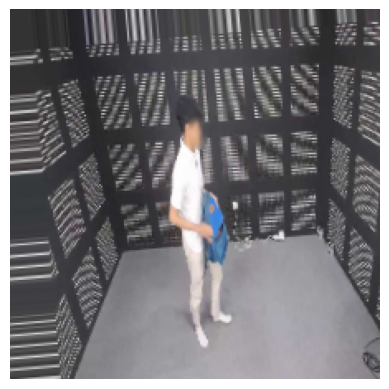

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Ambil satu batch dari generator (training atau validation)
x_batch, y_batch = next(train_generator)  # Anda bisa mengganti train_generator dengan val_generator untuk validasi

# Pilih gambar pertama dari batch (batch size adalah 32, kita ambil gambar pertama)
image = x_batch[0]

# Menampilkan gambar yang sudah diaugmentasi
# plt.imshow(image.reshape(150, 150), cmap='gray')  # Menggunakan cmap='gray' untuk menampilkan grayscale
plt.imshow(image)
plt.axis('off')  # Menghilangkan axis
plt.show()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

x_batch, y_batch = next(train_generator)
print(f"Tipe x_batch: {type(x_batch)}")  # Pastikan ini numpy array
print(f"Shape x_batch: {x_batch.shape}")  # Harus sesuai dengan ukuran input (misalnya (32, 150, 150, 3))
print(f"Shape y_batch: {y_batch.shape}")  # Sesuai dengan jumlah kelas (misalnya (32, 12))

Tipe x_batch: <class 'numpy.ndarray'>
Shape x_batch: (32, 224, 224, 3)
Shape y_batch: (32, 12)


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

# Load MobileNetV2 model with pretrained weights from ImageNet, exclude top layers
base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')

# base_model = load_model('/content/drive/MyDrive/DataSlayer/954_CNN_mobileNet_multiclass.h5')

# Freeze all layers in the base model (optional: untuk menjaga agar tidak terlalu banyak parameter yang di-update)
base_model.trainable = False

# Tambahkan lapisan tambahan untuk penyesuaian output
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Lapisan pooling global
x = Dense(64, activation='relu')(x)  # Additional dense layer with 64 neurons
x = Dropout(0.1)(x)  # Dropout for regularization
x = Dense(32, activation='relu')(x)  # Additional dense layer with 32 neurons
x = Dropout(0.1)(x)  # Dropout for regularization

# Output layer (sesuaikan jumlah kelas, misal 10 untuk klasifikasi 10 kelas)
output_layer = Dense(12, activation='softmax')(x)

for layer in base_model.layers[-20:]:  # Misalnya, buka 4 lapisan terakhir
    layer.trainable = True

# Bangun model final
model = Model(inputs=base_model.input, outputs=output_layer)

# Optimizer dengan learning rate kecil
optimizer = Adam(learning_rate=1e-4)

# Kompilasi model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Tampilkan ringkasan model
model.summary()


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 2,342,444 (8.94 MB)

 Trainable params: 1,290,540 (4.92 MB)

 Non-trainable params: 1,051,904 (4.01 MB)

In [ ]:
from sklearn.utils import class_weight
import numpy as np

# Hitung class weights
y_train = train_generator.classes
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = dict(enumerate(class_weights))
print("Class Weights:", class_weight_dict)


Class Weights: {0: 1.5534420289855073, 1: 1.5367383512544803, 2: 0.8309108527131783, 3: 0.8609437751004017, 4: 1.587962962962963, 5: 0.6555810397553516, 6: 1.4363484087102178, 7: 1.1165364583333333, 8: 0.8506944444444444, 9: 1.2427536231884058, 10: 0.7347900599828621, 11: 0.7984171322160148}


In [ ]:
import numpy as np

y_train = train_generator.classes
print("Unique Classes in Training Labels:", np.unique(y_train))


Unique Classes in Training Labels: [ 0  1  2  3  4  5  6  7  8  9 10 11]


In [ ]:

# # Melatih model Tanpa Repeat
# history = model.fit(
#     train_generator,
#     steps_per_epoch=train_generator.samples // train_generator.batch_size,
#     epochs=10,
#     validation_data=val_generator,
#     validation_steps=val_generator.samples // val_generator.batch_size,
#     callbacks=[early_stopping_callback],
# )

# Melatih model Dengan Repeat

history = model.fit(
    train_data,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=15,
    validation_data=validation_data,
    validation_steps=val_generator.samples // val_generator.batch_size,
    class_weight=class_weight_dict,  # Menambahkan class weights
    callbacks=[early_stopping_callback],
)


Epoch 1/15
107/107 ━━━━━━━━━━━━━━━━━━━━ 86s 639ms/step - accuracy: 0.3371 - loss: 2.0185 - val_accuracy: 0.3183 - val_loss: 1.8983
Epoch 2/15
107/107 ━━━━━━━━━━━━━━━━━━━━ 59s 557ms/step - accuracy: 0.7429 - loss: 0.8831 - val_accuracy: 0.5174 - val_loss: 1.3023
Epoch 3/15
107/107 ━━━━━━━━━━━━━━━━━━━━ 57s 536ms/step - accuracy: 0.8633 - loss: 0.4786 - val_accuracy: 0.5961 - val_loss: 1.0888
Epoch 4/15
107/107 ━━━━━━━━━━━━━━━━━━━━ 55s 523ms/step - accuracy: 0.8938 - loss: 0.3684 - val_accuracy: 0.7222 - val_loss: 0.8414
Epoch 5/15
107/107 ━━━━━━━━━━━━━━━━━━━━ 54s 508ms/step - accuracy: 0.9181 - loss: 0.2875 - val_accuracy: 0.7801 - val_loss: 0.6385
Epoch 6/15
107/107 ━━━━━━━━━━━━━━━━━━━━ 59s 557ms/step - accuracy: 0.9319 - loss: 0.2280 - val_accuracy: 0.8333 - val_loss: 0.5206
Epoch 7/15
107/107 ━━━━━━━━━━━━━━━━━━━━ 55s 520ms/step - accuracy: 0.9321 - loss: 0.2459 - val_accuracy: 0.8241 - val_loss: 0.4692
Epoch 8/15
107/107 ━━━━━━━━━━━━━━━━━━━━ 57s 536ms/step - accuracy: 0.9526 - loss: 0

In [ ]:
# Menggunakan model yang sudah dilatih untuk mengevaluasi data test
val_loss, val_accuracy = model.evaluate(val_generator)

print(f"Test Accuracy: {val_accuracy}")
print(f"Test Loss: {val_loss}")


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 184ms/step - accuracy: 0.9474 - loss: 0.1398
Test Accuracy: 0.9456018805503845
Test Loss: 0.15278829634189606


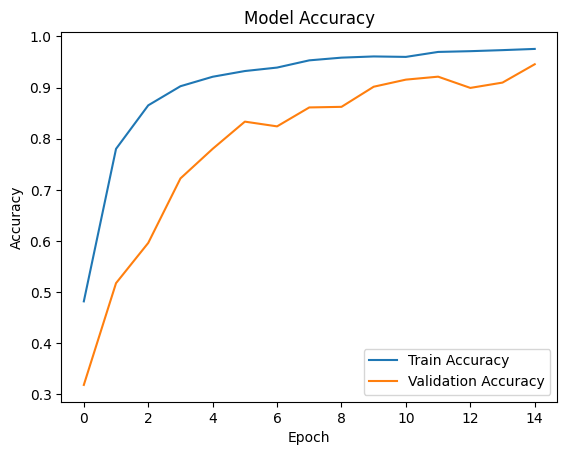

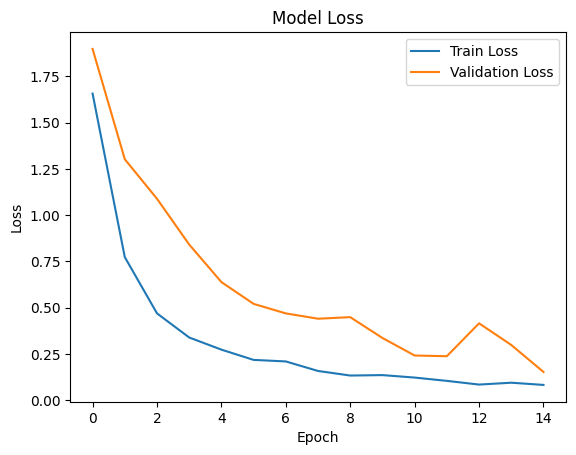

In [ ]:
import matplotlib.pyplot as plt

# Memvisualisasikan akurasi selama pelatihan
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Memvisualisasikan loss selama pelatihan
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Semua label kelas yang seharusnya
target_names = [
    'forward_fall', 'backward_fall', 'right_fall', 'left_fall',
    'sitting_fall', 'standing_fall', 'walking', 'jumping',
    'stretching', 'squat', 'picking', 'laying'
]

# Prediksi model
y_true = val_generator.classes
y_pred = np.argmax(model.predict(val_generator), axis=1)

# Classification report
print(classification_report(y_true, y_pred, target_names=target_names, labels=np.arange(len(target_names))))


27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 145ms/step
               precision    recall  f1-score   support

 forward_fall       0.06      0.06      0.06        47
backward_fall       0.02      0.02      0.02        47
   right_fall       0.11      0.13      0.12        87
    left_fall       0.08      0.08      0.08        84
 sitting_fall       0.02      0.02      0.02        45
standing_fall       0.14      0.16      0.15       109
      walking       0.04      0.04      0.04        50
      jumping       0.05      0.05      0.05        64
   stretching       0.05      0.05      0.05        85
        squat       0.07      0.07      0.07        58
      picking       0.11      0.09      0.10        98
       laying       0.14      0.12      0.13        90

     accuracy                           0.08       864
    macro avg       0.07      0.07      0.07       864
 weighted avg       0.08      0.08      0.08       864



#Save model

In [ ]:
model.save('/content/drive/MyDrive/DataSlayer/945_CNN_mobileNet_multiclass_dropout.h5')

In [ ]:
import json

# Simpan class indices ke file JSON
class_labels = train_generator.class_indices
with open('/content/drive/My Drive/DataSlayer/954class_labels(12class).json', 'w') as json_file:
    json.dump(class_labels, json_file)

In [ ]:
print("Train Generator Class Indices:")
print(train_generator.class_indices)

print("Validation Generator Class Indices:")
print(val_generator.class_indices)


Train Generator Class Indices:
{'backward_falls': 0, 'forward_falls': 1, 'jumping': 2, 'laying': 3, 'left_falls': 4, 'picking': 5, 'right_falls': 6, 'sitting_falls': 7, 'squat': 8, 'standing_falls': 9, 'stretching': 10, 'walking': 11}
Validation Generator Class Indices:
{'backward_falls': 0, 'forward_falls': 1, 'jumping': 2, 'laying': 3, 'left_falls': 4, 'picking': 5, 'right_falls': 6, 'sitting_falls': 7, 'squat': 8, 'standing_falls': 9, 'stretching': 10, 'walking': 11}


In [ ]:

# Mapping indeks multiclass ke binary
fall_classes = [0, 1, 4, 6, 7, 9]  # Kelas fall
non_fall_classes = [2, 3, 5, 8, 10, 11]  # Kelas non-fall

def classify_fall_or_non_fall(predictions):
    # Ambil indeks kelas dengan probabilitas tertinggi
    predicted_class_index = np.argmax(predictions, axis=1)[0]  # Prediksi satu sampel
    # Atau jika batch:
    # predicted_class_index = np.argmax(predictions, axis=1)  # Prediksi batch

    # Tentukan fall (1) atau non-fall (0)
    if predicted_class_index in fall_classes:
        return 1  # Fall
    else:
        return 0  # Non-Fall

In [ ]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Load the pre-trained model
model_path = '/content/drive/MyDrive/DataSlayer/945_CNN_mobileNet_multiclass_dropout.h5'
model = load_model(model_path)

# Compile model (untuk prediksi saja, mungkin tidak perlu kompilasi lagi)
# Optimizer dengan learning rate kecil
optimizer = Adam(learning_rate=1e-4)
model.compile(
    loss='categorical_crossentropy',  # categorical_crossentropy untuk multi-kelas
    optimizer=optimizer,
    metrics=['accuracy']
)

# Function untuk memuat dan memproses gambar
def load_and_process_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Ukuran sesuai dengan model
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Batch size = 1
    img_array = preprocess_input(img_array)  # Jika menggunakan MobileNetV2
    return img_array

# Path folder gambar
folder_path = '/content/dataset/test'  # Ganti dengan path folder Anda

# List untuk menyimpan hasil prediksi
results = []

# Iterasi melalui semua file dalam folder
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)

    # Cek apakah file adalah gambar
    if filename.lower().endswith(('png', 'jpg', 'jpeg')):
        print(f'Processing: {filename}')

        # Load dan proses gambar
        img_array = load_and_process_image(file_path)

        # Prediksi menggunakan model
        predictions = model.predict(img_array)

        # Menentukan kelas yang diprediksi (misalnya label 0 atau 1)
        predicted_class = classify_fall_or_non_fall(predictions)

        # Simpan hasil prediksi
        results.append({
            'id': filename,  # Nama file gambar sebagai ID
            'label': int(predicted_class)  # Label 0 atau 1
        })

# Convert hasil ke DataFrame
results_df = pd.DataFrame(results)

# Simpan hasil ke CSV
output_csv_path = '/content/drive/MyDrive/DataSlayer/predictions945_CNN_mobileNet_multiclass_dropout.csv'
results_df.to_csv(output_csv_path, index=False)

print(f'Predictions saved to {output_csv_path}')


Processing: a4245d3dd2.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Processing: 22118d3012.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Processing: 37528180ab.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Processing: 119a576dc0.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Processing: cf25405e0e.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Processing: 82b19a084b.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Processing: 22a67c4835.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Processing: 405d029d34.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Processing: 5695be435f.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Processing: 45819c1b85.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Processing: 9d87b466ac.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Processing: fe3ac677f8.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Processing: e9a81dc85e.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Processing: 8d3c646862.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Processing: 54d6fc6494.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Processing: e563152bf3.jpg
